## Imort the required library

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

## Read the data in csv

In [115]:
df=pd.read_csv("Titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Performing Exploratory data analysis(EDA)

In [116]:
df.shape

(418, 12)

In [117]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [118]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Visualising the feature

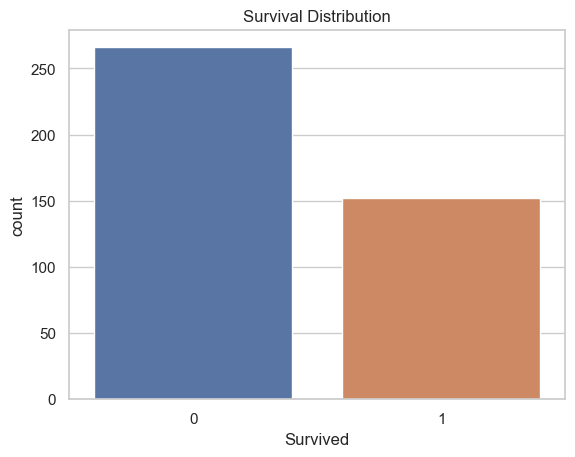

In [119]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

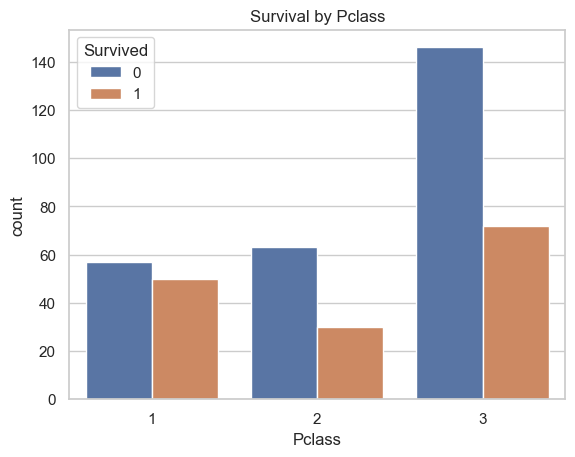

In [120]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Pclass')
plt.show()

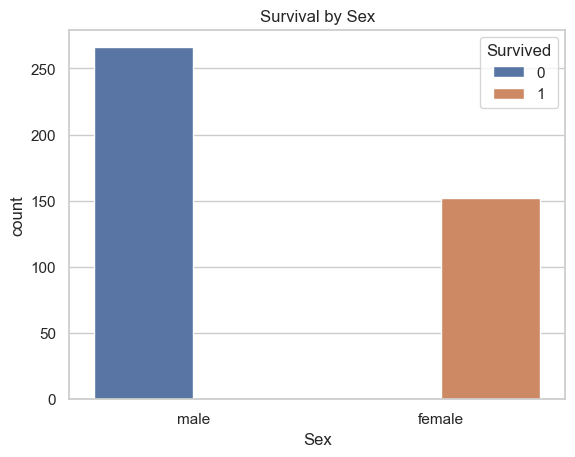

In [121]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

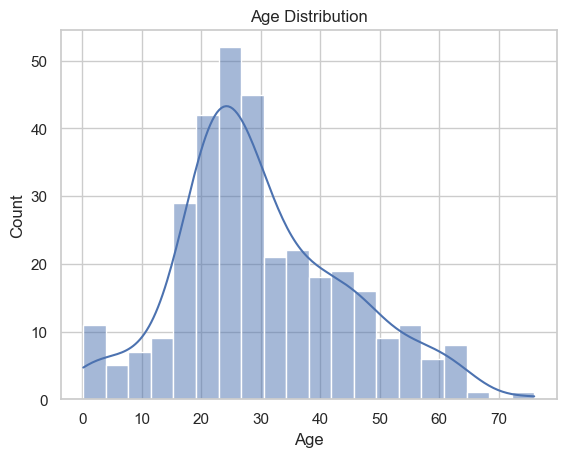

In [122]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


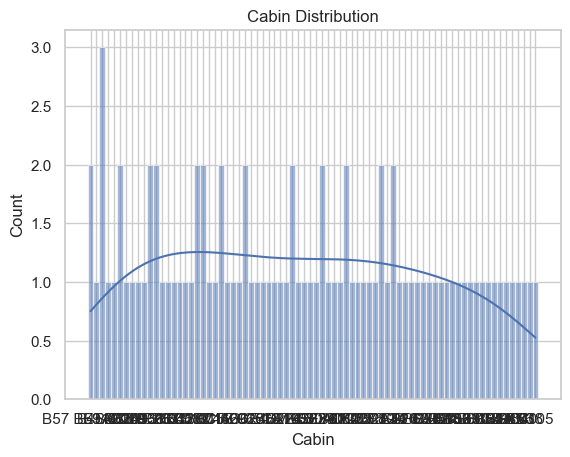

In [123]:
sns.histplot(df['Cabin'], bins=20, kde=True)
plt.title('Cabin Distribution')
plt.xlabel('Cabin')
plt.show()


## Dealing with null values

In [124]:
#Dropping the cabin column as having maximum null values and it less important factor for the problem.
df1=df.drop("Cabin", axis=1)
df1.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [125]:
#Filling null values with median looking at skiwness in graph to bring it nearer to mean.
df1["Age"].fillna(df1['Age'].median(), inplace=True)

In [126]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

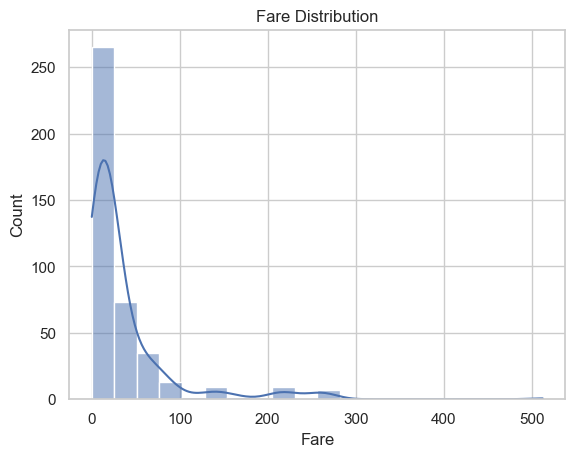

In [127]:
sns.histplot(df['Fare'], bins=20, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

In [128]:
#Filling null values with median looking at skiwness in graph
df1["Fare"].fillna(df1['Fare'].median(), inplace=True)

In [129]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


## Encoding the data to numerical.

In [131]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

df1['Sex'] = label_encoder.fit_transform(df1['Sex'])
df1['Name'] = label_encoder.fit_transform(df1['Name'])
df1['Ticket'] = label_encoder.fit_transform(df1['Ticket'])
df1['Embarked'] = label_encoder.fit_transform(df1['Embarked'])

In [132]:
df1=df1.drop("Name", axis=1)
df1=df1.drop("Ticket", axis=1)

In [133]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,1
1,893,1,3,0,47.0,1,0,7.0000,2
2,894,0,2,1,62.0,0,0,9.6875,1
3,895,0,3,1,27.0,0,0,8.6625,2
4,896,1,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,27.0,0,0,8.0500,2
414,1306,1,1,0,39.0,0,0,108.9000,0
415,1307,0,3,1,38.5,0,0,7.2500,2
416,1308,0,3,1,27.0,0,0,8.0500,2


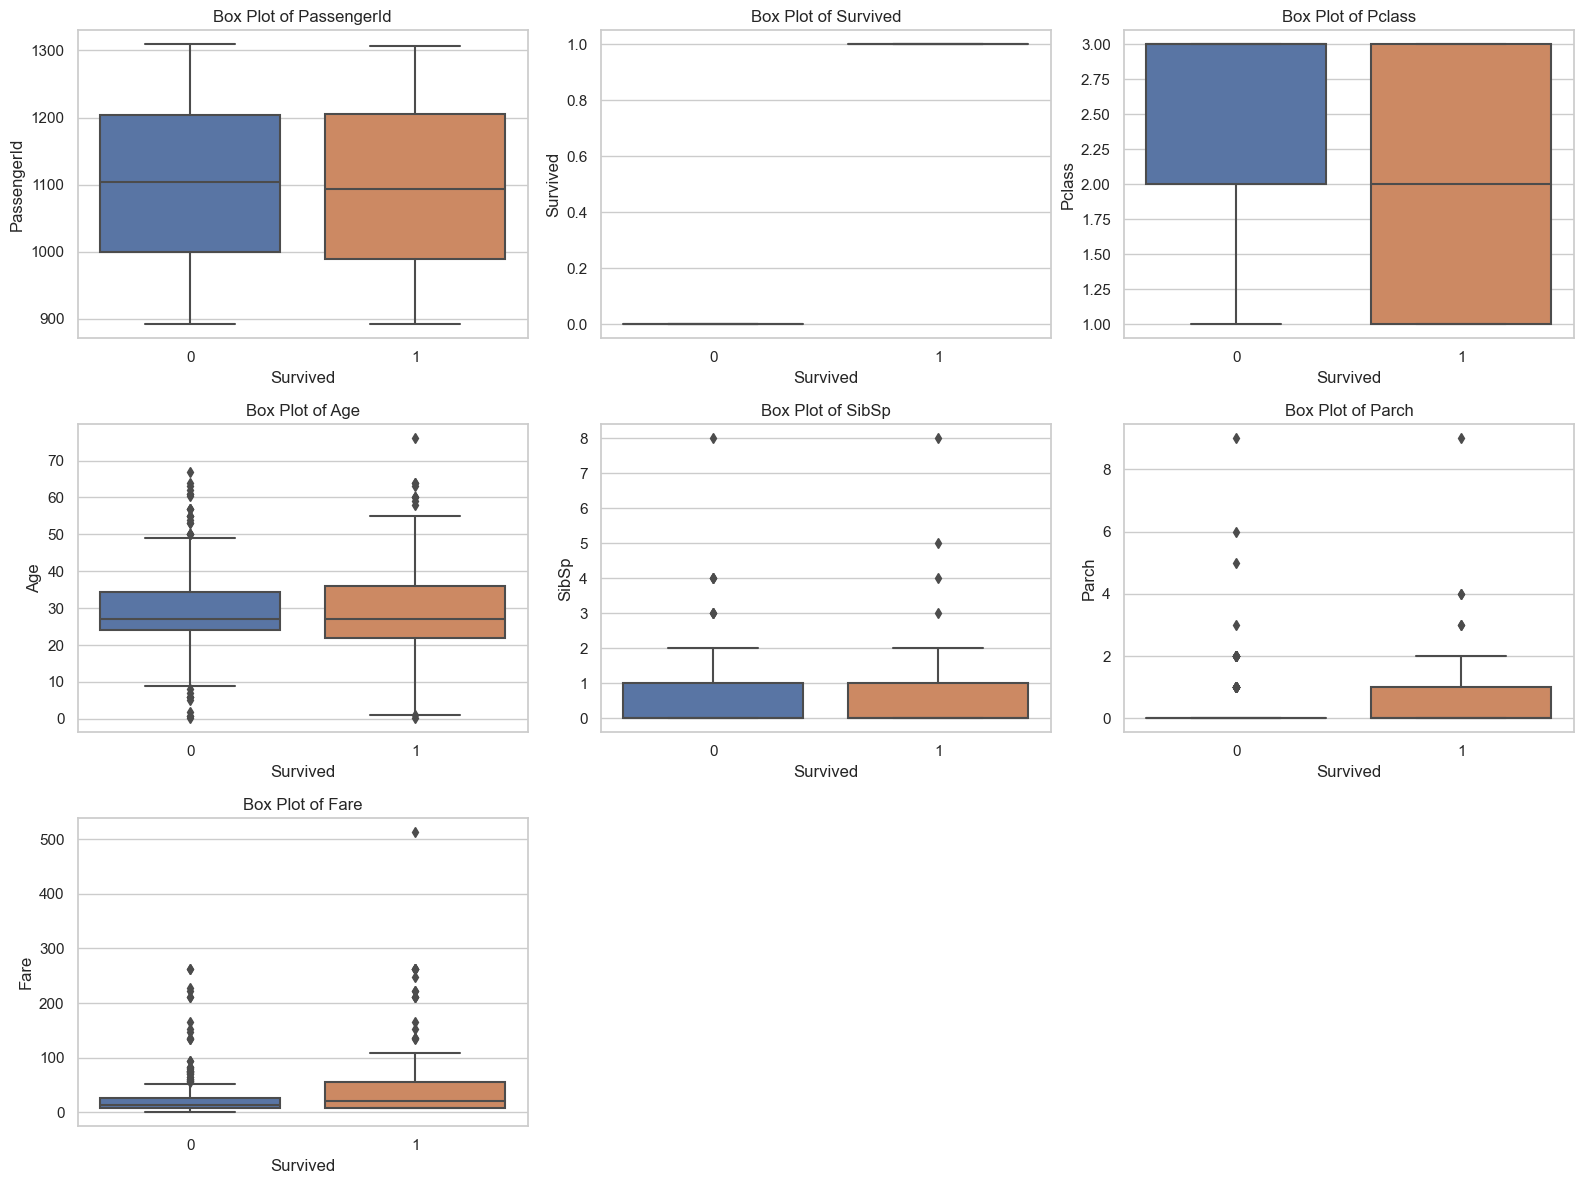

In [134]:

numerical_columns = df1.select_dtypes(include=['int64', 'float64'])

# Set the figure size and style
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

# Create subplots for each numerical feature
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid of subplots
    sns.boxplot(x='Survived', y=column, data=df1)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


## Checking the correlation amoung the features.

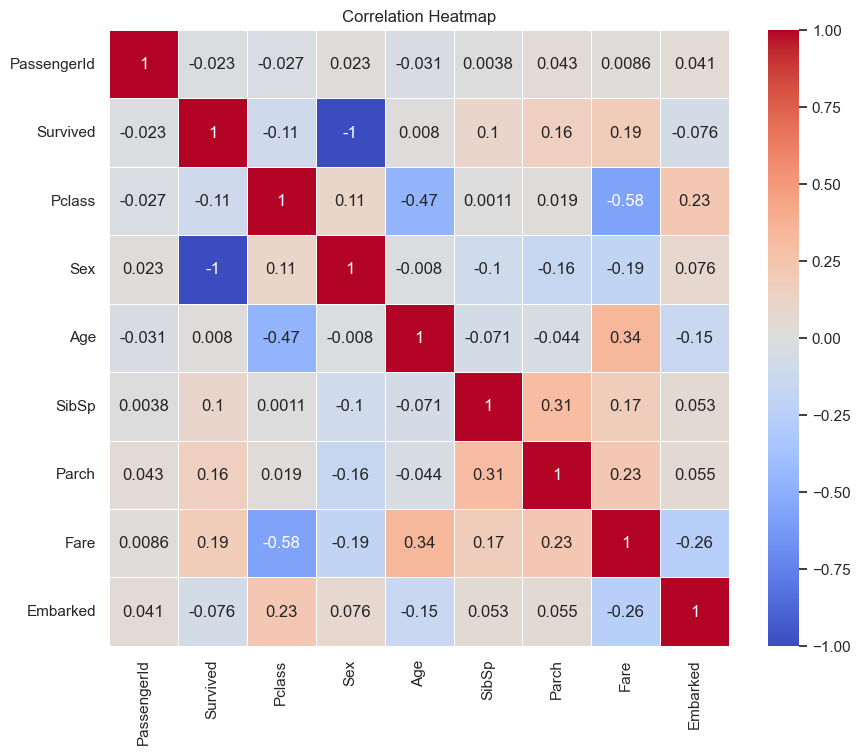

In [135]:
import matplotlib.pyplot as plt

correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Spliting data in tarin and test

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df1.drop("Survived", axis=1)  
y = df1["Survived"] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance and fit it on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the testing data
X_test_scaled = scaler.transform(X_test)


## Applying algorithm and checking results.

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a dictionary to store results
results = {}

# Initialize and fit classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=258, min_samples_split= 5, min_samples_leaf= 1, max_depth= 6, criterion= 'gini', bootstrap= False),
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Store results in the dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": confusion
    }

# Print results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print()


Model: Logistic Regression
Accuracy: 1.00
Confusion Matrix:
[[50  0]
 [ 0 34]]

Model: Decision Tree
Accuracy: 1.00
Confusion Matrix:
[[50  0]
 [ 0 34]]

Model: Random Forest
Accuracy: 1.00
Confusion Matrix:
[[50  0]
 [ 0 34]]



In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid to search over
param_dist = {
    'n_estimators': np.arange(50, 300),  
    'max_depth': [None] + list(np.arange(5, 30)), 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False], 
    'criterion': ['gini', 'entropy'] 
}

# Create a RandomForestClassifier
rf = RandomForestClassifier()

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, n_jobs=-1, random_state=42
)

# Fit the RandomizedSearchCV on your training data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_estimator.score(X_test_scaled, y_test)
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Data:", accuracy)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'n_estimators': 258, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 6, 'criterion': 'gini', 'bootstrap': False}
Accuracy on Test Data: 1.0


In [139]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on your training data
rf.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}' ({importances[indices[f]]:.4f})")


Feature ranking:
1. Feature 'Sex' (0.8346)
2. Feature 'Fare' (0.0435)
3. Feature 'PassengerId' (0.0364)
4. Feature 'Age' (0.0362)
5. Feature 'Parch' (0.0193)
6. Feature 'Pclass' (0.0118)
7. Feature 'SibSp' (0.0100)
8. Feature 'Embarked' (0.0082)


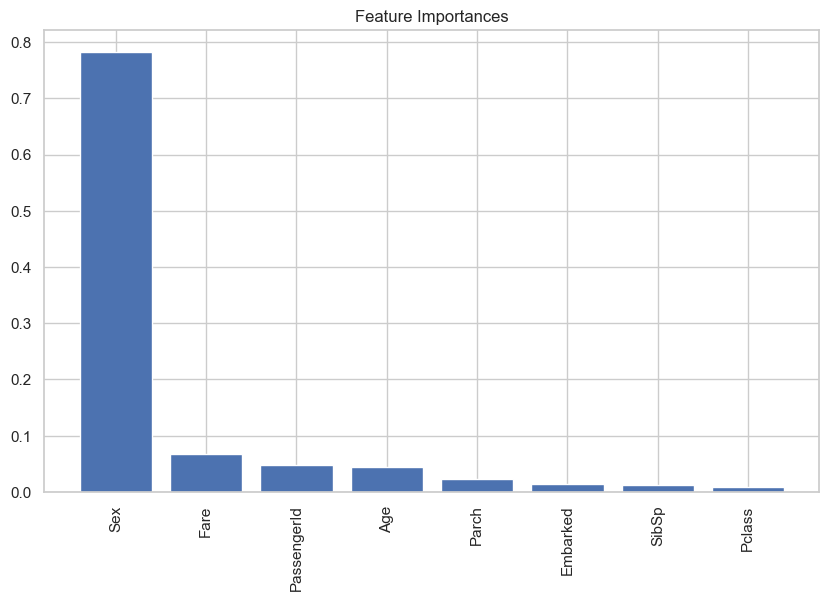

In [140]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model to your training data
rf.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.show()
